In [1]:
import numpy as np 
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import plotly
import seaborn as sns
%matplotlib inline
print("libraries imported successfully")

libraries imported successfully


In [2]:
df_terrorism = pd.read_csv('global_terrorism_dataset.csv',encoding ='latin1')

C:\Users\shrad\AppData\Local\Temp\ipykernel_24080\3633301435.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df_terrorism = pd.read_csv('global_terrorism_dataset.csv',encoding ='latin1')


In [3]:
df_terrorism.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  
3       -9        -9        1       1      NaN  
4       -9        -9        1       1      NaN  

[5 rows x 135 columns]

In [4]:
df_terrorism.shape

(181691, 135)

In [5]:
df_terrorism.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [6]:
#Renaming the columns
df_terrorism.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'State',
                   'region_txt':'Region','city':'City','latitude':'Latitude','longitude':'Longitude',
                   'attacktype1_txt':'AttackType','targtype1_txt':'TargetType','targsubtype1_txt':'TargetSubType',
                   'weaptype1_txt':'WeaponType','gname':'Group','nkill':'Killed','nwound':'Wounded','summary':'Summary','motive':'Motive'},inplace=True)

In [7]:
#Extracting Necessary Columns
df_terrorism= df_terrorism[['eventid','Year','Month','Day','Country','State','Region','City','Latitude','Longitude','AttackType','TargetType','TargetSubType'
       ,'suicide','Killed','Wounded','Summary','Group','WeaponType','Motive']]

In [8]:
#viewing first five entries
df_terrorism.head()

eventid  Year  Month  Day             Country    State  \
0  197000000001  1970      7    2  Dominican Republic      NaN   
1  197000000002  1970      0    0              Mexico  Federal   
2  197001000001  1970      1    0         Philippines   Tarlac   
3  197001000002  1970      1    0              Greece   Attica   
4  197001000003  1970      1    0               Japan  Fukouka   

                        Region           City   Latitude   Longitude  \
0  Central America & Caribbean  Santo Domingo  18.456792  -69.951164   
1                North America    Mexico city  19.371887  -99.086624   
2               Southeast Asia        Unknown  15.478598  120.599741   
3               Western Europe         Athens  37.997490   23.762728   
4                    East Asia        Fukouka  33.580412  130.396361   

                       AttackType                   TargetType  \
0                   Assassination  Private Citizens & Property   
1     Hostage Taking (Kidnapping)      Government (Diplomatic)   
2                   Assassination          Journalists & Media   
3               Bombing/Explosion      Government (Diplomatic)   
4  Facility/Infrastructure Attack      Government (Diplomatic)   

                                       TargetSubType  suicide  Killed  \
0                                     Named Civilian        0     1.0   
1  Diplomatic Personnel (outside of embassy, cons...        0     0.0   
2                    Radio Journalist/Staff/Facility        0     1.0   
3                                  Embassy/Consulate        0     NaN   
4                                  Embassy/Consulate        0     NaN   

   Wounded Summary                               Group  WeaponType Motive  
0      0.0     NaN                              MANO-D     Unknown    NaN  
1      0.0     NaN  23rd of September Communist League     Unknown    NaN  
2      0.0     NaN                             Unknown     Unknown    NaN  
3      NaN     NaN                             Unknown  Explosives    NaN  
4      NaN     NaN                             Unknown  Incendiary    NaN

In [9]:
df_terrorism.describe()

eventid           Year          Month            Day  \
count  1.816910e+05  181691.000000  181691.000000  181691.000000   
mean   2.002705e+11    2002.638997       6.467277      15.505644   
std    1.325957e+09      13.259430       3.388303       8.814045   
min    1.970000e+11    1970.000000       0.000000       0.000000   
25%    1.991021e+11    1991.000000       4.000000       8.000000   
50%    2.009022e+11    2009.000000       6.000000      15.000000   
75%    2.014081e+11    2014.000000       9.000000      23.000000   
max    2.017123e+11    2017.000000      12.000000      31.000000   

            Latitude     Longitude        suicide         Killed  \
count  177135.000000  1.771340e+05  181691.000000  171378.000000   
mean       23.498343 -4.586957e+02       0.036507       2.403272   
std        18.569242  2.047790e+05       0.187549      11.545741   
min       -53.154613 -8.618590e+07       0.000000       0.000000   
25%        11.510046  4.545640e+00       0.000000       0.000000   
50%        31.467463  4.324651e+01       0.000000       0.000000   
75%        34.685087  6.871033e+01       0.000000       2.000000   
max        74.633553  1.793667e+02       1.000000    1570.000000   

             Wounded  
count  165380.000000  
mean        3.167668  
std        35.949392  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         2.000000  
max      8191.000000

Text(0, 0.5, 'Incidents')

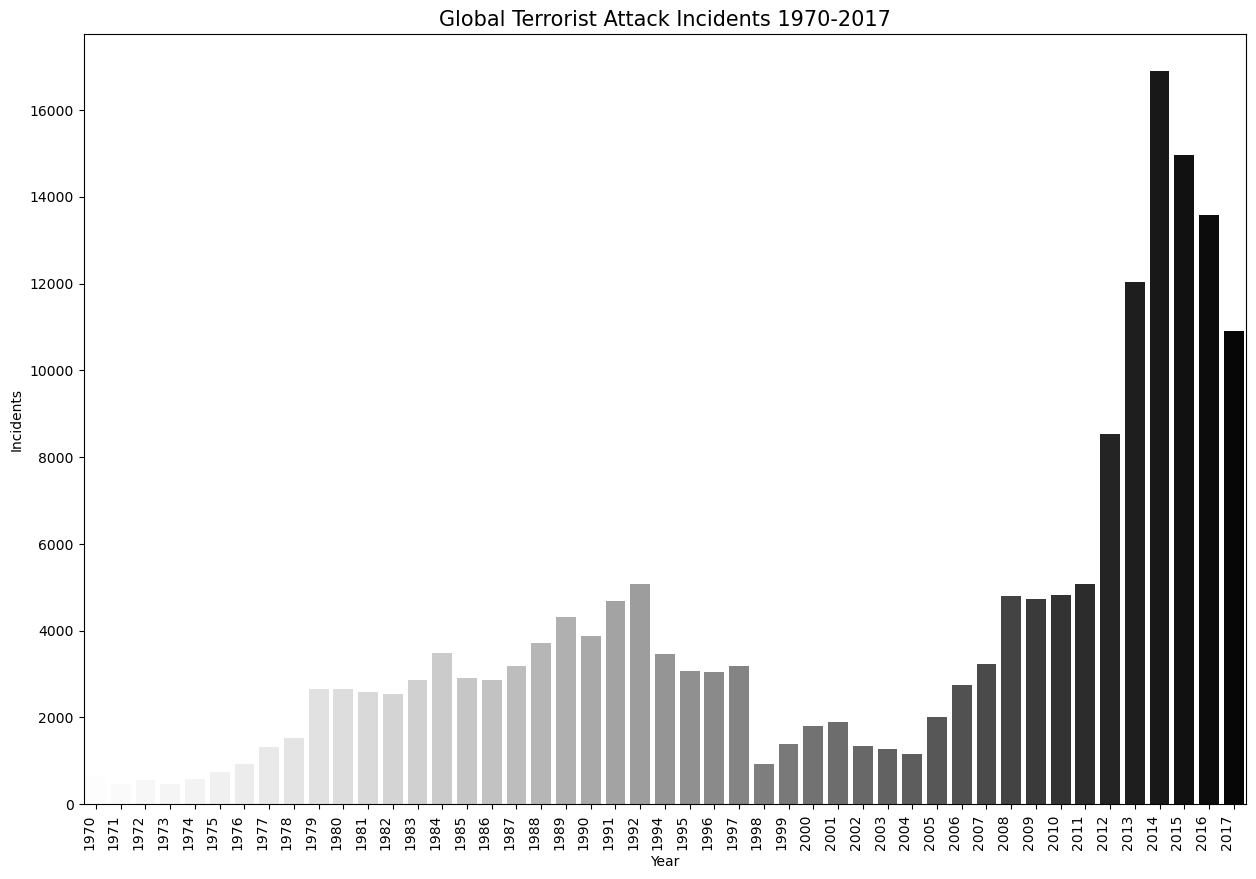

In [10]:
plt.figure(figsize =(15,10))
ax = sns.countplot(x = 'Year',data =df_terrorism,palette = 'Greys')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, ha ="right")
plt.title('Global Terrorist Attack Incidents 1970-2017', size = 15)
plt.ylabel('Incidents')

Text(0, 0.5, 'count of year')

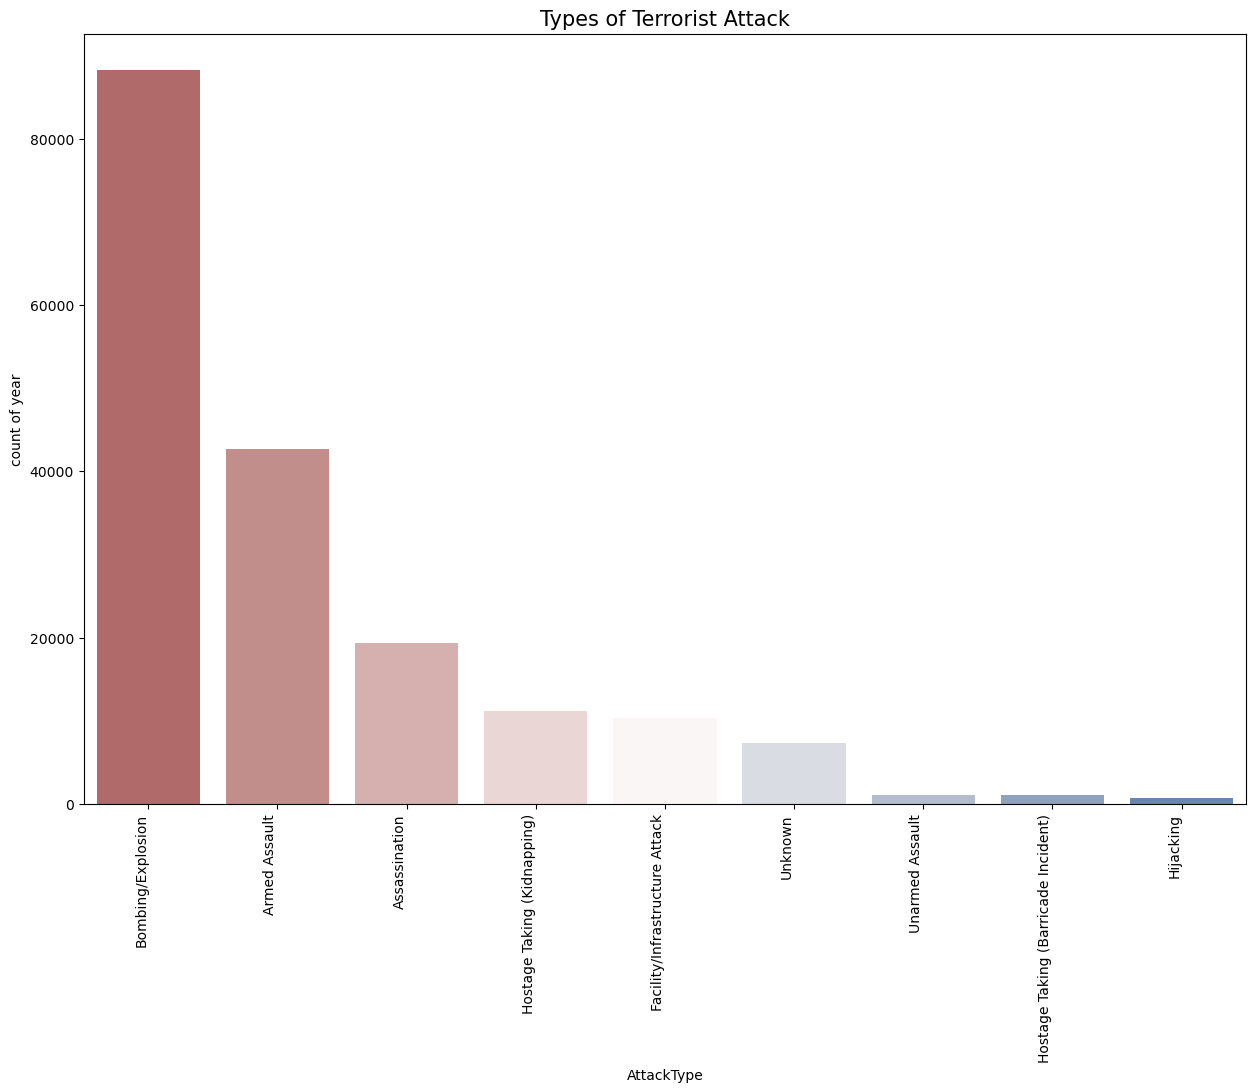

In [11]:
plt.figure(figsize =(15,10))
ax = sns.countplot(x='AttackType',data =df_terrorism, palette ='vlag_r',order =df_terrorism['AttackType'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation =90,ha = "right")
plt.title('Types of Terrorist Attack',size =15)
plt.ylabel('count of year')

In [12]:
df_bombing =df_terrorism[df_terrorism['AttackType'] == 'Bombing/Explosion']

Text(-3.9305555555555483, 0.5, 'Incidents')

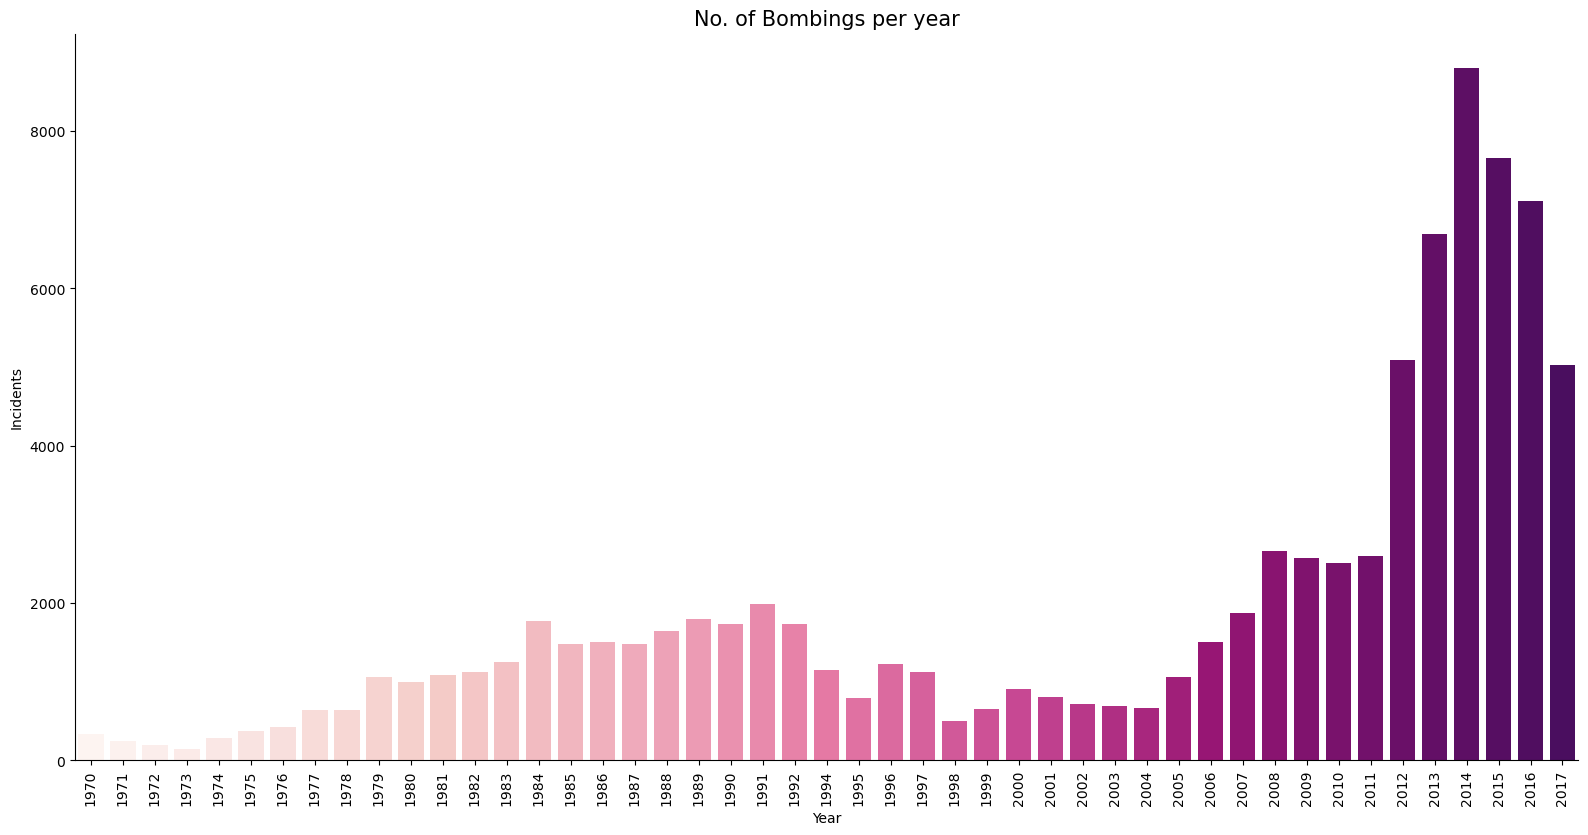

In [13]:
sns.catplot(x ='Year', data = df_bombing,kind ='count', height= 8, aspect =2, palette ='RdPu')
plt.xticks(rotation =90)
plt.title('No. of Bombings per year',size =15)
plt.ylabel('Incidents')

Text(0, 0.5, 'Number of attacks')

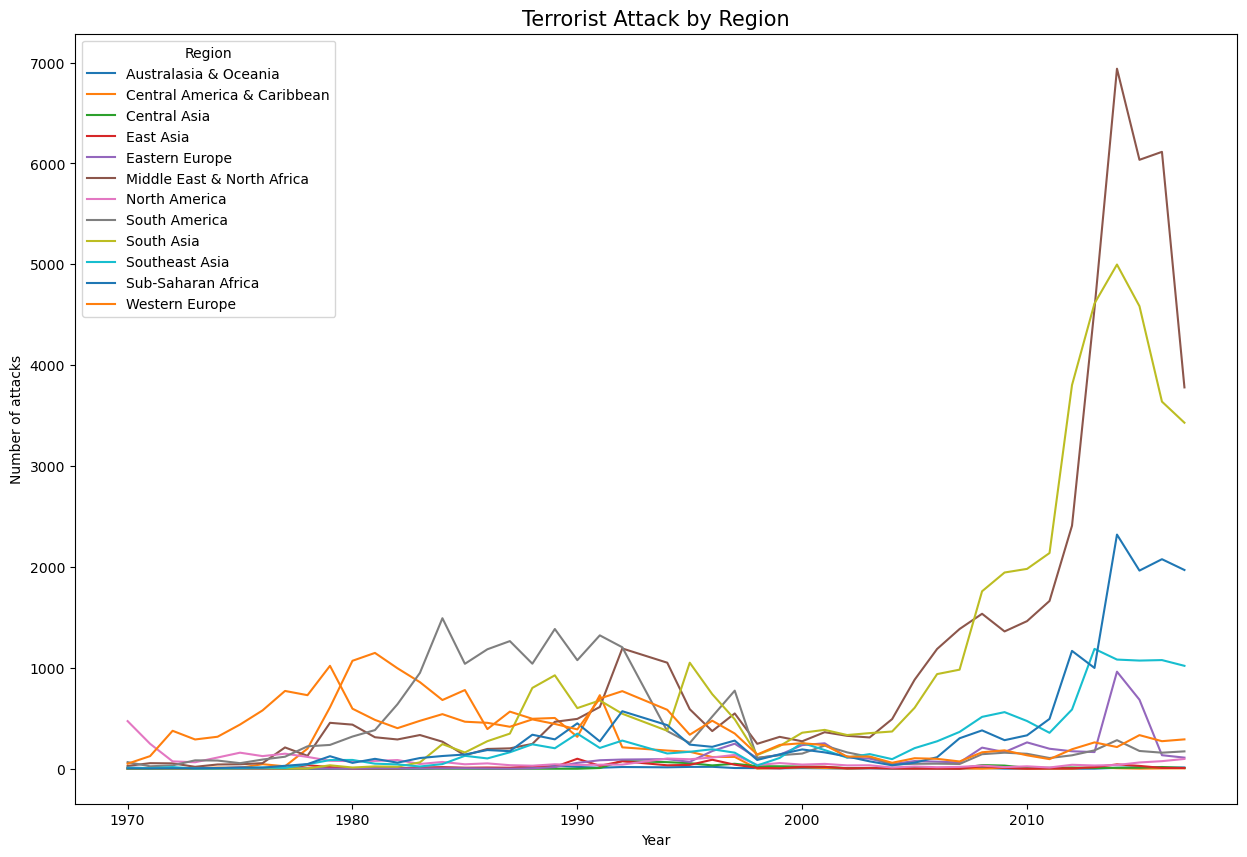

In [14]:
pd.crosstab(df_terrorism.Year,df_terrorism.Region).plot(figsize =(15,10))
plt.title('Terrorist Attack by Region',size =15)
plt.ylabel('Number of attacks')

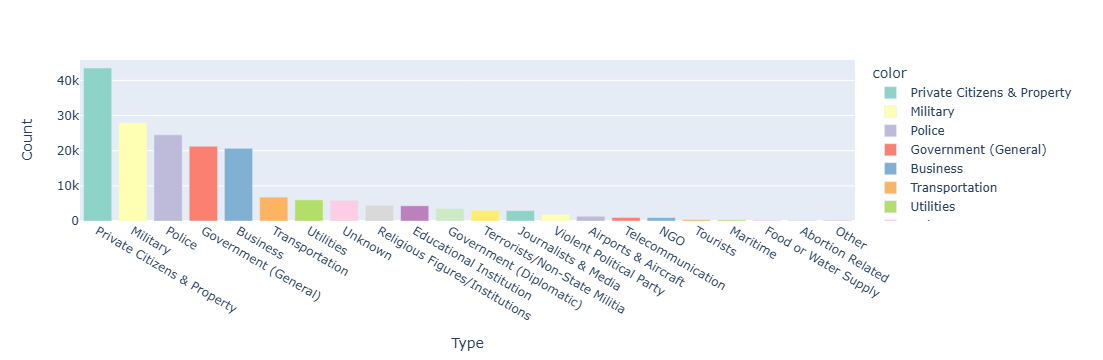

In [15]:
import plotly.express as px

fig = px.bar(x=df_terrorism['TargetType'].value_counts().index, 
             y=df_terrorism['TargetType'].value_counts().values, 
             labels={'x':'Type', 'y':'Count'}, 
             color=df_terrorism['TargetType'].value_counts().index,
             color_discrete_sequence=px.colors.qualitative.Set3)
fig.show()


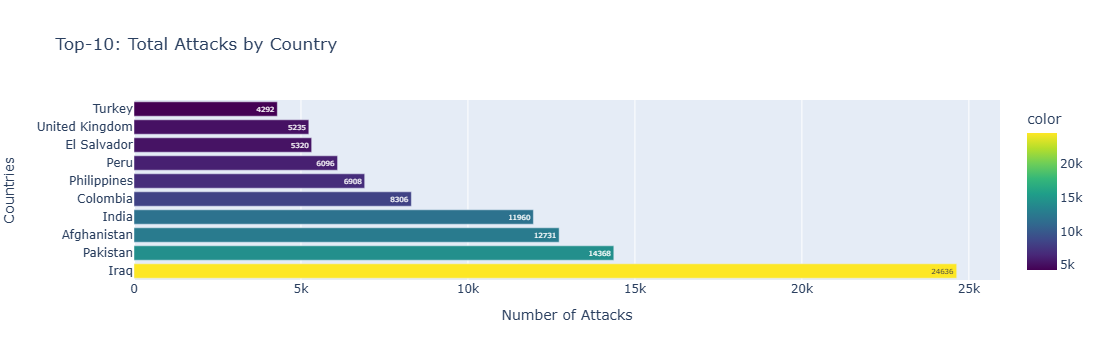

In [17]:
top_countries = df_terrorism['Country'].value_counts()[:10]

fig = px.bar(x=top_countries.values, 
             y=top_countries.index, 
             orientation='h', 
             labels={'x':'Number of Attacks', 'y':'Countries'}, 
             text=top_countries.values,
             title='Top-10: Total Attacks by Country',
             color=top_countries.values,
             color_continuous_scale='viridis')

fig.show()

Text(0.5, 1.0, 'Attacks per Region (1970-2017)')

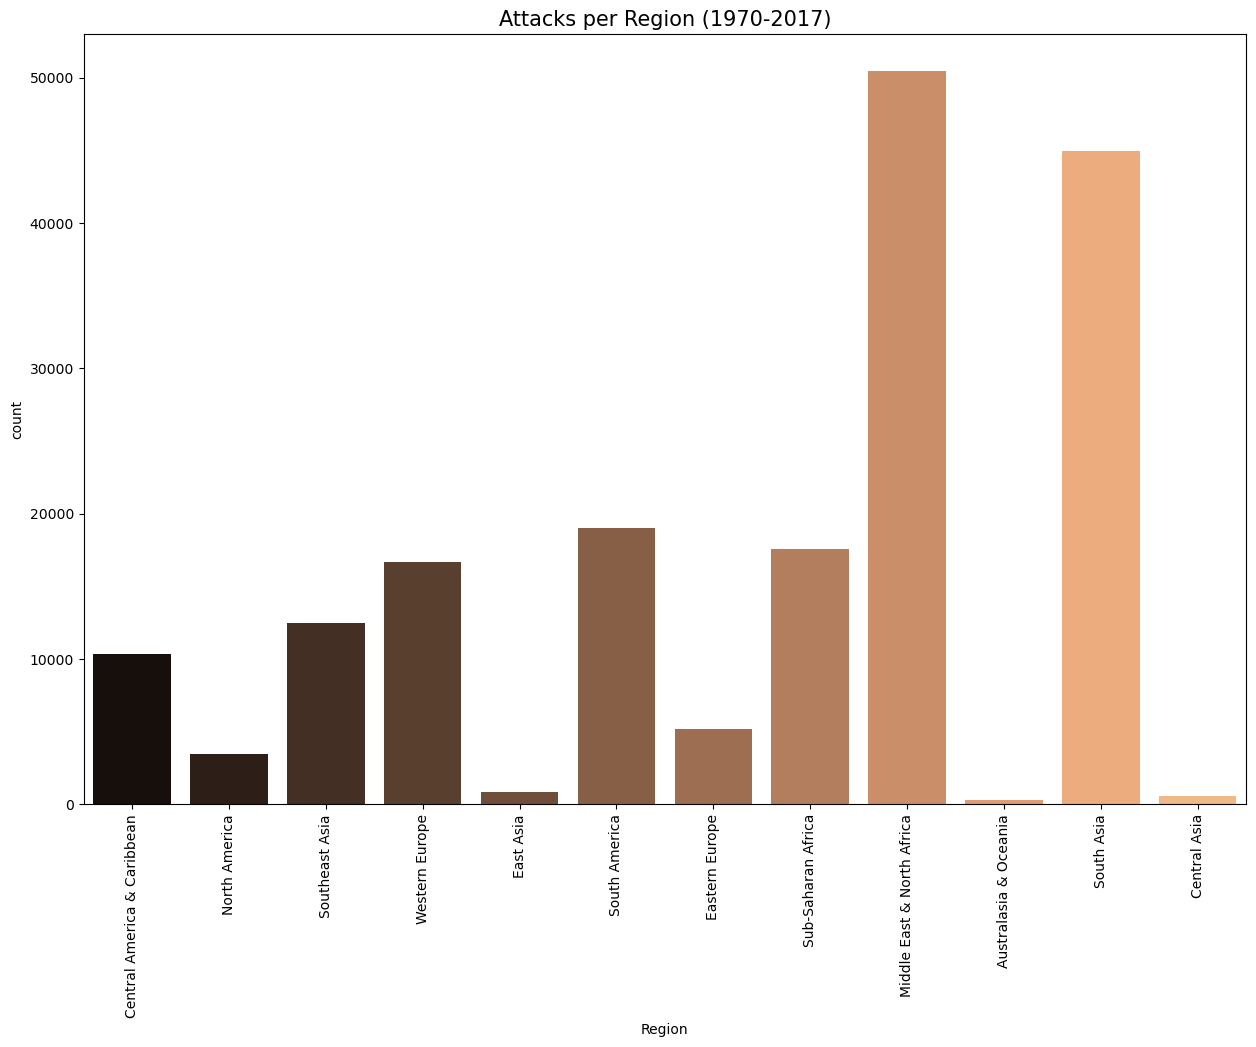

In [34]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(x='Region', data=df_terrorism, palette='copper')
plt.xticks(rotation=90)
plt.title('Attacks per Region (1970-2017)', size=15)

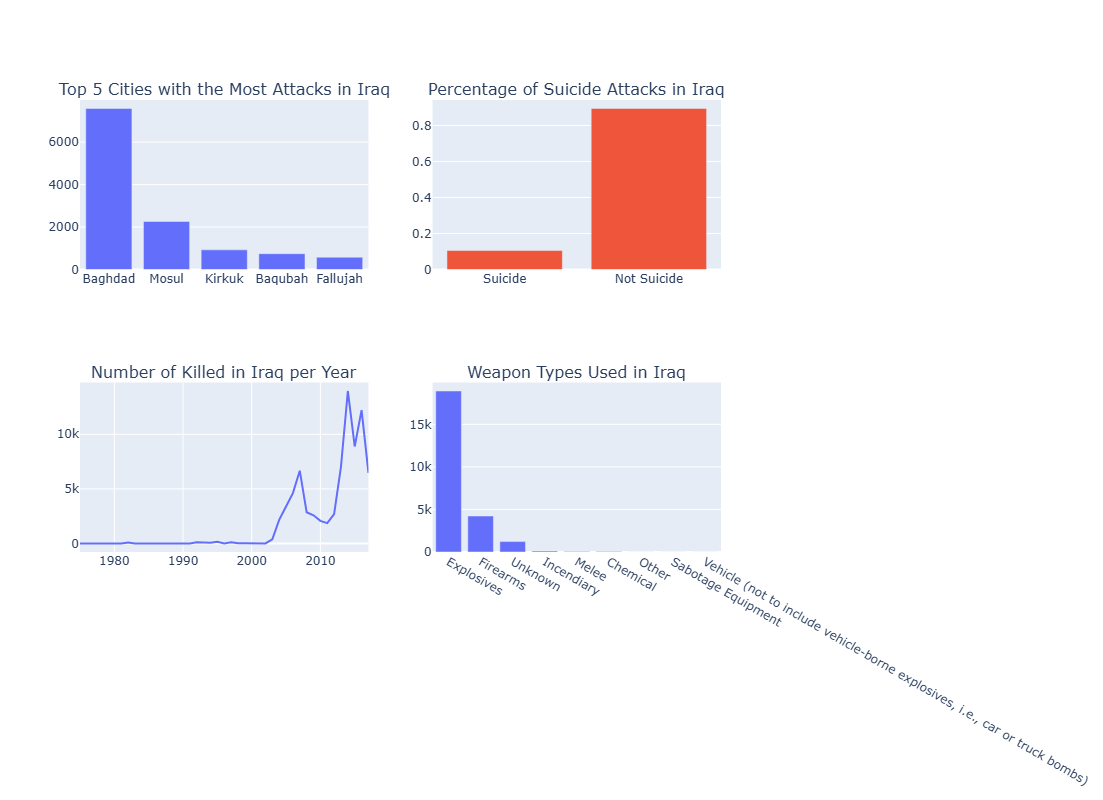

In [40]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

# Top 5 Cities with the Most Attacks in Iraq
Iraq = df_terrorism[df_terrorism['Country'] == 'Iraq']
Iraq_cities = Iraq.groupby(by='City', as_index=False).count().sort_values(by='eventid', ascending=False).iloc[:5,]

fig1 = px.bar(Iraq_cities, x='City', y='eventid', labels={'City': 'City', 'eventid': 'Number of Attacks'})
fig1.update_layout(title='Top 5 Cities with the Most Attacks in Iraq')

# Percentage of Suicide Attacks in Iraq (changed to a bar chart)
Iraq_suicide_size = Iraq['suicide'].sum() / len(Iraq)
values = [Iraq_suicide_size, 1 - Iraq_suicide_size]
fig2 = go.Figure(data=[go.Bar(x=['Suicide', 'Not Suicide'], y=values)])
fig2.update_layout(title='Percentage of Suicide Attacks in Iraq')

# Number of Killed in Iraq per Year
Iraq_year = Iraq.groupby(by='Year', as_index=False).sum().loc[:, ['Year', 'Killed']]
fig3 = px.line(Iraq_year, x='Year', y='Killed', title='Number of Killed in Iraq per Year', labels={'Year': 'Year', 'Killed': 'Number of Killed'})

# Weapon Types Used in Iraq
Iraq_weapon = Iraq.groupby(by='WeaponType', as_index=False).count().sort_values(by='eventid', ascending=False).iloc[:, :2]
fig4 = px.bar(Iraq_weapon, x='WeaponType', y='eventid', labels={'WeaponType': 'Weapon Type', 'eventid': 'Number of Attacks'})
fig4.update_layout(title='Weapon Types Used in Iraq')

# Combine into a single frame
fig = make_subplots(rows=2, cols=2, subplot_titles=("Top 5 Cities with the Most Attacks in Iraq", "Percentage of Suicide Attacks in Iraq", 
                                                    "Number of Killed in Iraq per Year", "Weapon Types Used in Iraq"))

fig.add_trace(fig1['data'][0], row=1, col=1)
fig.add_trace(fig2['data'][0], row=1, col=2)
fig.add_trace(fig3['data'][0], row=2, col=1)
fig.add_trace(fig4['data'][0], row=2, col=2)

fig.update_layout(height=800, showlegend=False)

fig.show()

